# Data-5 Team-2
### Week 4, Tasks 3 and 4

## Task 3

importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

importing the playstore dataset

In [2]:
df1 = pd.read_csv("../Week 1/exported_data/googleplaystore_clean.csv")
df1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.0,10000,Free,0.0,Everyone
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.0,500000,Free,0.0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,8.7,5000000,Free,0.0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.0,50000000,Free,0.0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.8,100000,Free,0.0,Everyone
...,...,...,...,...,...,...,...,...,...
9655,Sya9a Maroc - FR,FAMILY,4.500000,38,53.0,5000,Free,0.0,Everyone
9656,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.6,100,Free,0.0,Everyone
9657,Parkinson Exercices FR,MEDICAL,4.172966,3,9.5,1000,Free,0.0,Everyone
9658,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,Varies with device,1000,Free,0.0,Mature 17+


importing the reviews dataset

In [3]:
df2 = pd.read_csv("Data/googleplaystore_user_reviews_clean_scores.csv")
df2

,Unnamed: 0,App,Translated_Review,affin_score,np_score
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,13.0,4
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,4.0,1
2,2,10 Best Foods for You,,0.0,0
3,3,10 Best Foods for You,Works great especially going grocery store,3.0,2
4,4,10 Best Foods for You,Best idea us,3.0,1
...,...,...,...,...,...
64290,64290,Houzz Interior Design Ideas,,0.0,0
64291,64291,Houzz Interior Design Ideas,,0.0,0
64292,64292,Houzz Interior Design Ideas,,0.0,0
64293,64293,Houzz Interior Design Ideas,,0.0,0


merging both datasets

In [4]:
df = pd.merge(df1, df2, how='inner', on="App")
# dropping the column that contained the index for the reviews dataset
df =  df.drop(labels='Unnamed: 0', axis=1)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Translated_Review,affin_score,np_score
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,A kid's excessive ads. The types ads allowed a...,-2.0,-1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,It bad >:(,-3.0,-1
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,like,2.0,1
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,,0.0,0
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,I love colors inspyering,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
61551,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,,0.0,0
61552,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,,0.0,0
61553,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,Too much ads,0.0,0
61554,A+ Gallery - Photos & Videos,PHOTOGRAPHY,4.5,223941,Varies with device,10000000,Free,0.0,Everyone,Just allow time ...,1.0,0


Summing the scores for each app 

In [18]:
df_app_scores = df[df["Type"] != "Free"].groupby("App")[["affin_score", "np_score"]].sum().sort_values(by=["affin_score"], ascending=False).reset_index()
df_app_scores

,App,affin_score,np_score
0,Dr. Panda & Toto's Treehouse,464.0,168
1,Essential Anatomy 3,404.0,158
2,Diabetes & Diet Tracker,364.0,150
3,Golfshot Plus: Golf GPS,171.0,57
4,Farming Simulator 18,160.0,36
5,BIG Launcher,95.0,19
6,Beautiful Widgets Pro,91.0,30
7,HD Widgets,85.0,40
8,EMT Tutor NREMT-B Study Guide,0.0,0
9,EMT Review Plus,0.0,0


Now obtaining the apps, their categories and their scores

In [31]:
df_paid = df1[df1["Type"] != "Free"]
df_paid = pd.merge(df_paid, df_app_scores, how='inner', on="App").loc[:, ["App", "Category", "affin_score", "np_score"]].sort_values(by=["affin_score"], ascending=False).reset_index(drop=True)
df_paid

,App,Category,affin_score,np_score
0,Dr. Panda & Toto's Treehouse,FAMILY,464.0,168
1,Essential Anatomy 3,MEDICAL,404.0,158
2,Diabetes & Diet Tracker,MEDICAL,364.0,150
3,Golfshot Plus: Golf GPS,SPORTS,171.0,57
4,Farming Simulator 18,GAME,160.0,36
5,BIG Launcher,PERSONALIZATION,95.0,19
6,Beautiful Widgets Pro,PERSONALIZATION,91.0,30
7,HD Widgets,PERSONALIZATION,85.0,40
8,EMT Tutor NREMT-B Study Guide,MEDICAL,0.0,0
9,Camera FV-5,PHOTOGRAPHY,0.0,0


listing the paid apps with highest affin score

In [32]:
df_top = df_paid.iloc[:5, :]
df_top

,App,Category,affin_score,np_score
0,Dr. Panda & Toto's Treehouse,FAMILY,464.0,168
1,Essential Anatomy 3,MEDICAL,404.0,158
2,Diabetes & Diet Tracker,MEDICAL,364.0,150
3,Golfshot Plus: Golf GPS,SPORTS,171.0,57
4,Farming Simulator 18,GAME,160.0,36


listing the paid apps with lowest affin score

In [39]:
df_worst = df_paid.iloc[-5:, :].sort_values(by=["affin_score"])
df_worst

,App,Category,affin_score,np_score
17,Call of Duty:Black Ops Zombies,GAME,-1.0,-1
13,Clue,GAME,0.0,0
14,EMT Review Plus,MEDICAL,0.0,0
15,Card Wars - Adventure Time,FAMILY,0.0,0
16,Breathing Zone,MEDICAL,0.0,0


creating a new data frame that contains the top and worst apps in order to plot them

In [42]:
top_and_worst = pd.concat([df_top, df_worst.sort_values(by=["affin_score"], ascending=False)]).reset_index(drop=True)
top_and_worst

,App,Category,affin_score,np_score
0,Dr. Panda & Toto's Treehouse,FAMILY,464.0,168
1,Essential Anatomy 3,MEDICAL,404.0,158
2,Diabetes & Diet Tracker,MEDICAL,364.0,150
3,Golfshot Plus: Golf GPS,SPORTS,171.0,57
4,Farming Simulator 18,GAME,160.0,36
5,Clue,GAME,0.0,0
6,EMT Review Plus,MEDICAL,0.0,0
7,Card Wars - Adventure Time,FAMILY,0.0,0
8,Breathing Zone,MEDICAL,0.0,0
9,Call of Duty:Black Ops Zombies,GAME,-1.0,-1


plotting the new data frame

Text(0.5, 1.0, 'Top 5 and worst 5 Apps According to Their Affin Score')

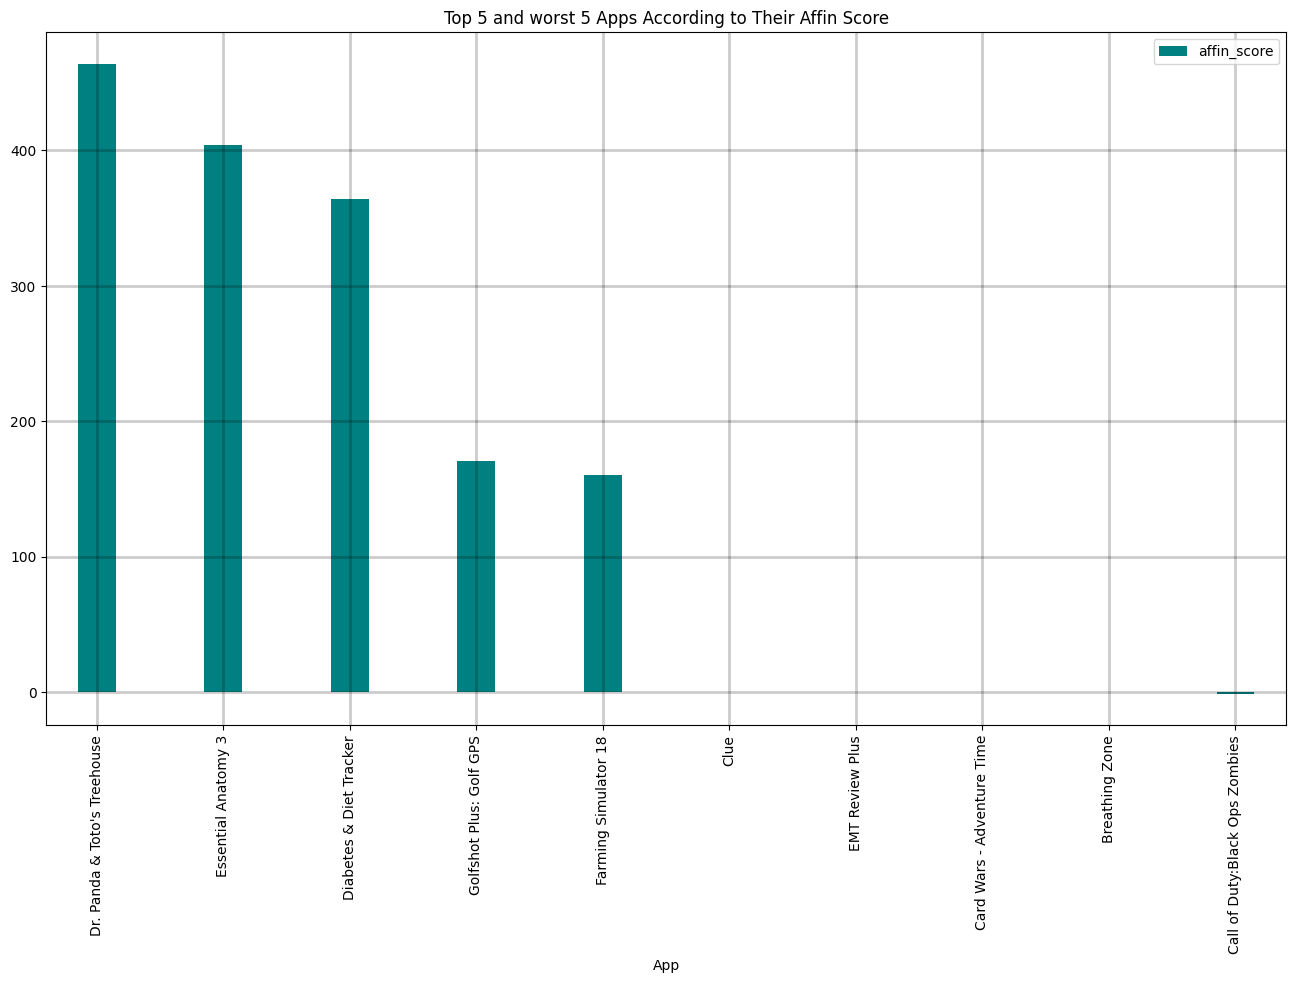

In [47]:
top_and_worst.plot(kind='bar', x="App", y="affin_score", 
                   figsize=(16,9), color='teal', width=0.3)
plt.grid(color = 'black', alpha=0.2, linewidth = 2)
plt.title("Top 5 and worst 5 Apps According to Their Affin Score")

## Task 4

listing the categories according to their affin scores

In [48]:
df_ranked = df.groupby(['Category'])['affin_score'].sum().sort_values(ascending=False).reset_index(drop=False)
df_ranked

,Category,affin_score
0,GAME,22370.0
1,HEALTH_AND_FITNESS,8197.0
2,FAMILY,6118.0
3,MEDICAL,3915.0
4,PRODUCTIVITY,3896.0
5,EDUCATION,3388.0
6,DATING,3380.0
7,SPORTS,3147.0
8,PHOTOGRAPHY,3114.0
9,TRAVEL_AND_LOCAL,3077.0


plotting the ranking

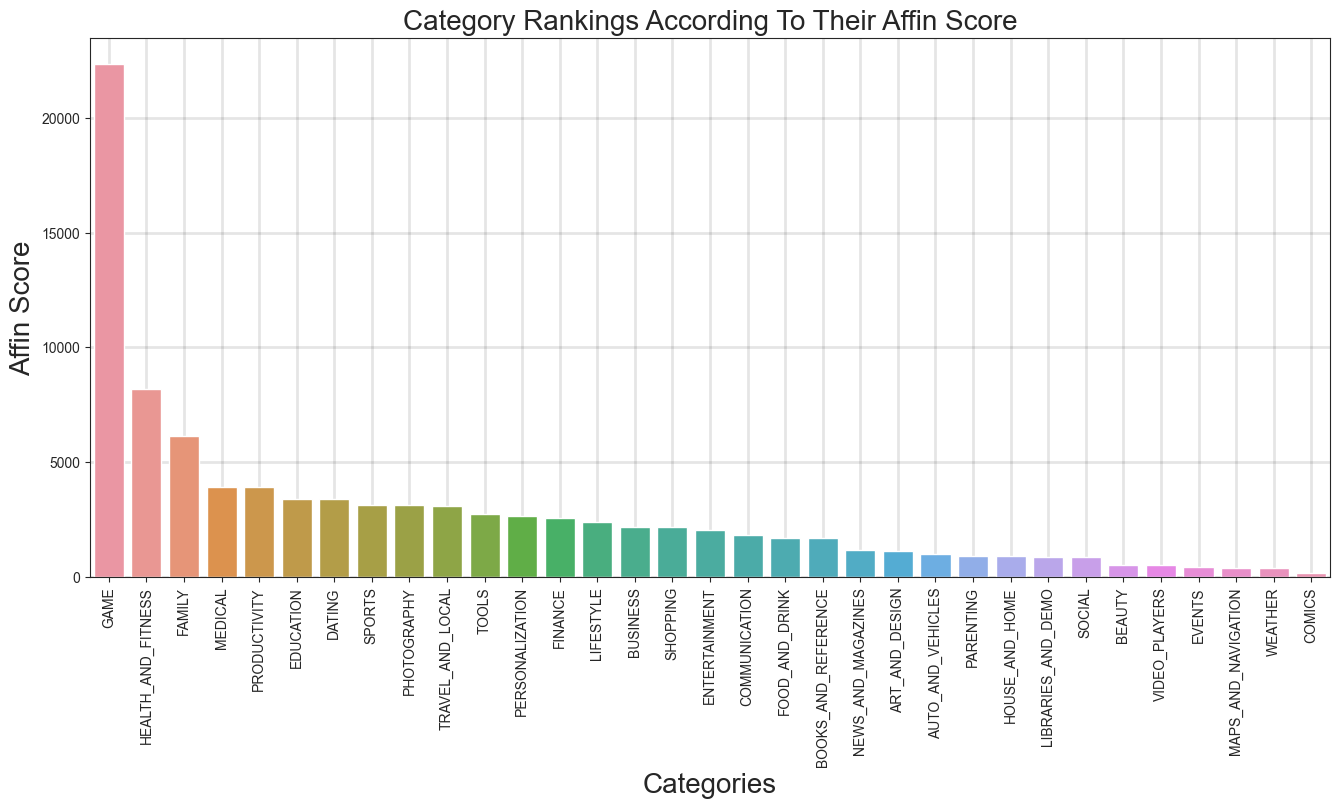

<Figure size 640x480 with 0 Axes>

In [50]:
sns.set_style("ticks")
plt.figure(figsize=(16,7))
sns.barplot(x="Category", y="affin_score", data=df_ranked)
sns.set_context("talk", font_scale=0.7)
plt.title("Category Rankings According To Their Affin Score", fontsize=20)
plt.ylabel("Affin Score", fontsize=20)
plt.xlabel("Categories", fontsize=20)
plt.xticks(rotation=90)   
plt.grid(color = 'black', alpha=0.1, linewidth = 2)
plt.show()
plt.clf()


As a result, The **Gaming** category has the highest sentiment value according to the affin score.